In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
load_dir = 'F:/OneDrive - American International University-Bangladesh/Semester-10/COMPUTER VISION AND PATTERN RECOGNITION/CVPR/final/facial_recognition'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_valid.pickle"), "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_valid.pickle"), "rb")
y_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

In [3]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(256,256,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    ## output layer
    layers.Dense(18, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                        

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [5]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, restore_best_weights=True)


h = model.fit(x=X_train, y=y_train, batch_size=32, epochs=150, validation_data=(X_valid, y_valid), callbacks=[cb], verbose=1)

Epoch 1/150
4/4 [==============================] - 11s 732ms/step - loss: 4.8433 - accuracy: 0.0857 - val_loss: 7.7802 - val_accuracy: 0.0556
Epoch 2/150
4/4 [==============================] - 1s 127ms/step - loss: 2.8423 - accuracy: 0.3143 - val_loss: 5.9882 - val_accuracy: 0.0556
Epoch 3/150
4/4 [==============================] - 1s 124ms/step - loss: 1.2427 - accuracy: 0.6476 - val_loss: 5.8310 - val_accuracy: 0.0556
Epoch 4/150
4/4 [==============================] - 0s 122ms/step - loss: 0.5408 - accuracy: 0.8476 - val_loss: 5.2048 - val_accuracy: 0.0556
Epoch 5/150
4/4 [==============================] - 0s 121ms/step - loss: 0.5102 - accuracy: 0.8381 - val_loss: 4.5783 - val_accuracy: 0.1111
Epoch 6/150
4/4 [==============================] - 0s 120ms/step - loss: 0.2021 - accuracy: 0.9714 - val_loss: 4.1119 - val_accuracy: 0.1111
Epoch 7/150
4/4 [==============================] - 0s 121ms/step - loss: 0.1535 - accuracy: 0.9524 - val_loss: 3.7352 - val_accuracy: 0.1111
Epoch 8/150


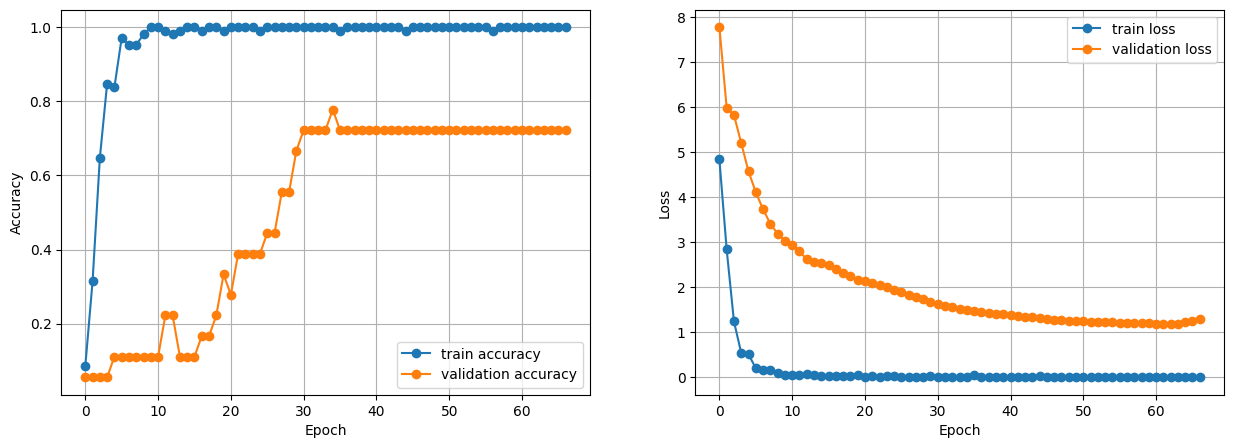

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 [==============================] - 1s 571ms/step - loss: 1.1793 - accuracy: 0.6275

Test Accuracy: 0.6274510025978088

Test Loss: 1.179341197013855


In [8]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 106ms/step


In [10]:
model_path = 'F:/OneDrive - American International University-Bangladesh/Semester-10/COMPUTER VISION AND PATTERN RECOGNITION/CVPR/final/facial_recognition'

model.save(os.path.join(model_path, "cnn.h5"))

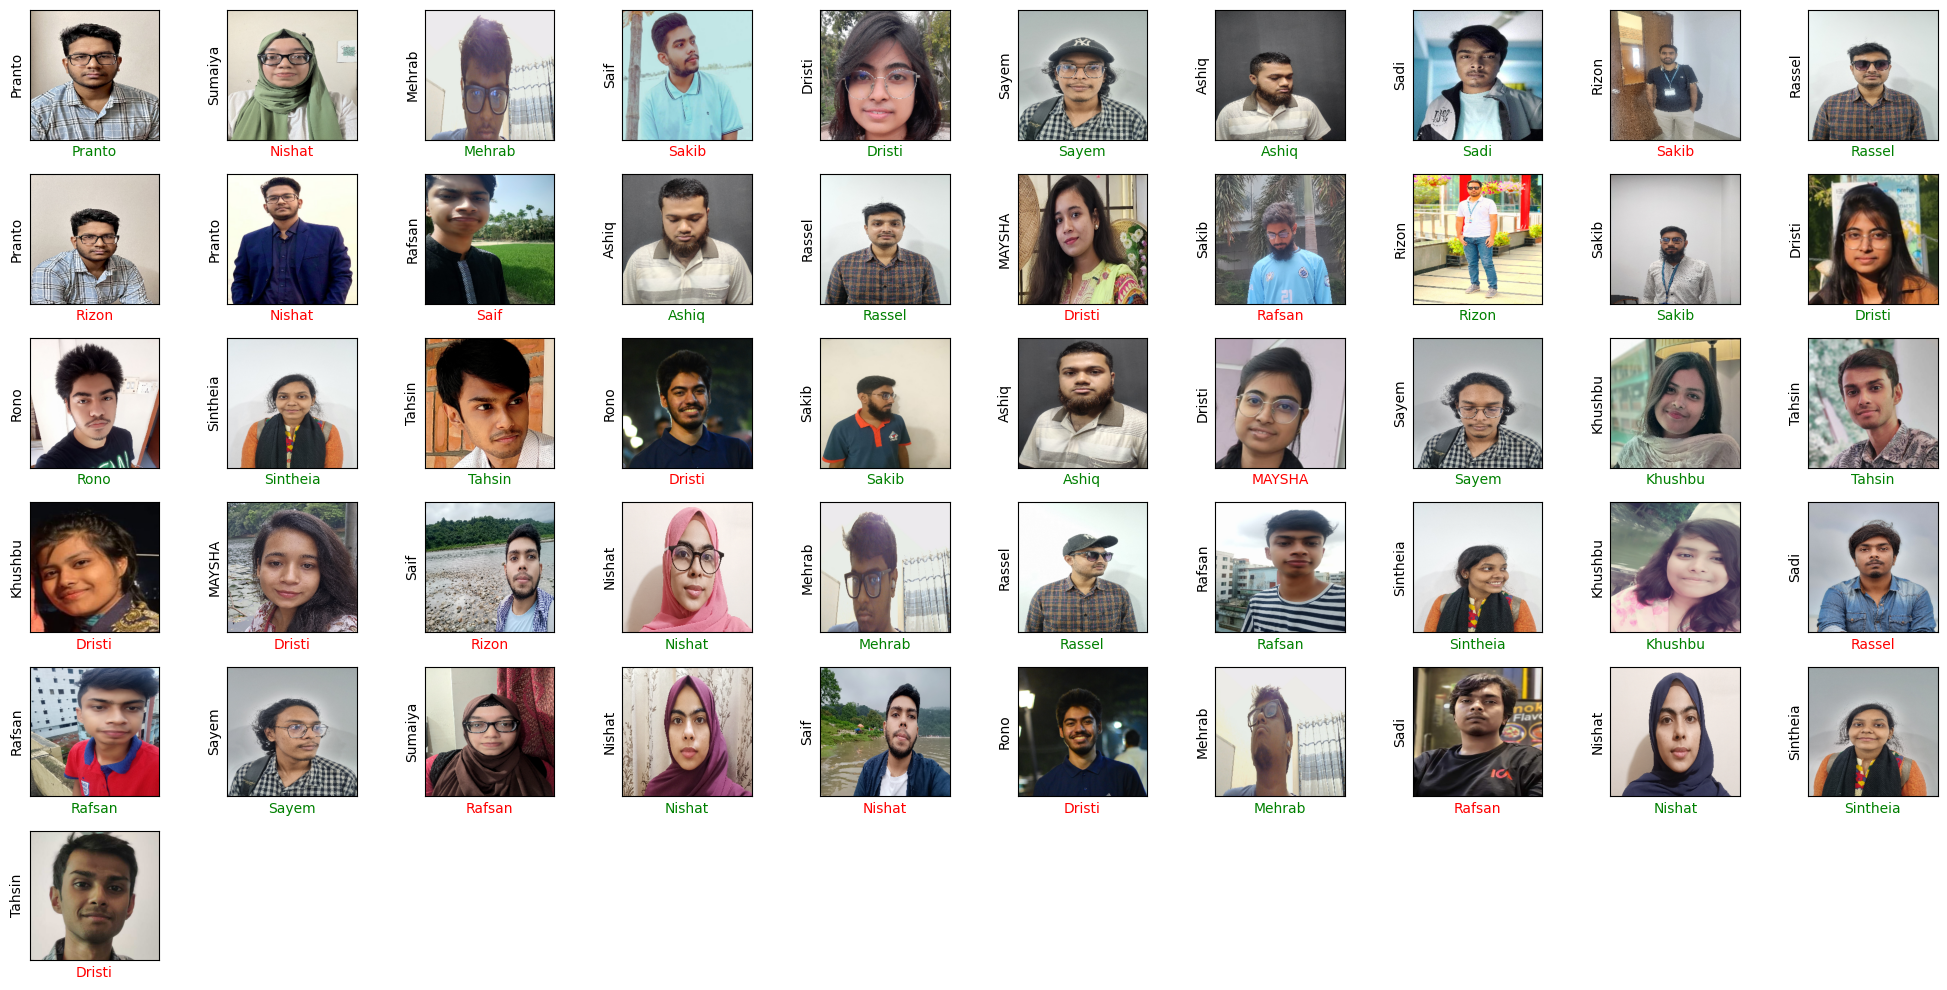

In [9]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(len(X_test)):
    
    plt.subplot(6, 10, i+1)
    plt.imshow(X_test[i].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(categories[y_test[i]])
    if y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(categories[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(categories[np.argmax(predictions[i])], color='r')
        
    

plt.tight_layout()
plt.show()